# Prospective evaluation of policies to reduce energy demand reduction policies for residential space heating

**Objective**:
The present exercise values, with the help of the technical-economic model Res-IRF, the effect of the main energy efficiency subsidies (tax credit for energy transition, co-payment of zero-rate, VAT at reduced rate, energy saving certificates), the carbon tax and the thermal regulation on the energy demand for heating homes in France.

About **this Notebook**:  
This notebook is an example of post-treatment to **assess public policies**.  
It takes as input a folder with at least 2 output of Res-IRF run. Each represents a scenario: one considering the public policies, and one not.

**Step 1: Run Res-IRF with Multiple scenarios.**   
**Step 2: Launch this Notebook and put folder name that is a Res-IRF ouput folder.**


About **Res-IRF**:  
The Res-IRF model is a tool for simulating energy consumption for space heating in the French residential sector.  
Its main characteristic is to integrate a detailed description of the energy performance of the dwelling stock with a rich description of household behaviour.


## Modeling framework
The Res-IRF model integrates a detailed description of the energy performance of the housing stock - based on the energy labels of the energy performance diagnosis (DPE) for electricity consumption, natural gas, domestic fuel and wood energy for heating - and of the characteristics of the households - differentiated by type of housing, income level and occupancy status.

Res-IRF endogenously determines the dynamics of new construction, the dynamics of thermal renovation of existing dwellings and the differences between real and conventional energy consumption, particularly due to the rebound effect. These mechanisms are modulated by parameters reflecting different barriers to energy efficiency, such as financing constraints, non-energy attributes of the renovations, contradictory incentives between the owner and the tenant of the same dwelling, and the obstacles to collective decision-making in co-ownership.

## Methodology for evaluating public policies

The simulations are based on the following principles:
1. All instruments apply from 2012 (except the carbon tax which applies from 2014) and are maintained until 2050 ; they are therefore taken into account in the calibration of the model;
2. The different instruments are fully cumulative with each other;
3. The instruments operate at full capacity; in particular, a household who achieves an innovation takes all the aids for which he or she is eligible;
4. The instruments apply equally to private and social housing;
5. Incentives are perfectly transmitted to households, without being captured by energy efficiency sellers in the form of an increase in the base price; this mechanism is based on an assumption of perfect competition in the energy innovation sector


More generally, the study aims at least as much to illustrate qualitatively the mechanisms by which the different instruments operate as to provide a precise quantitative assessment of their impact.

### Evaluation indicator

Version 3.0 of Res-IRF allows for a multi-criteria evaluation of policies. 
- The **effectiveness** of an intervention - instrument or mix of instruments - is measured as its ability to achieve the **objectives** assigned to it - in this case, the five objectives defined bellow. 
- To this indicator, we now add the **efficiency** of an intervention, valued as its capacity to achieve a certain **objective at the lowest cost**. This notion only applies to incentive instruments and therefore not to thermal regulation. Two efficiency indicators are calculated: 
    - **cost-efficiency** and,
    - **leverage effect**. 
- Finally, the differentiation of households by income category allows us to evaluate the **distributional effects**.

**Objectives**:

1. Reduction of **final energy consumption by 20% by 2030** and **50% by 2050** compared to 2012 - this objective is applied here to residential heating consumption;
2. Energy renovation of **500,000 homes per year**, including 120,000 in social housing;
3. Disappearance of **G and F** energy performance housing **by 2025**;
4. Renovation of the **entire housing stock** to the "low-energy building" level or similar **by 2050**- a requirement interpreted here as a minimum performance equal to the B label of the DPE;
5. Reducing **fuel poverty by 15% by 2020**.


#### Effectivness
Evaluating the additional effect of an intervention requires the formulation of a counterfactual scenario, without the intervention under consideration.

Two counterfactual situations, obtained by two different methods, are of particular interest because they allow us to limit the impact of each instrument:
- Method TP-1: the TP scenario is compared to an alternative scenario without the instrument under consideration. The difference between the two scenarios gives the impact of the instrument in interaction with all the other instruments.
- ZP+1 method: the ZP scenario is compared to an alternative scenario with the instrument under consideration. The difference between the two scenarios gives the pure impact of the instrument.

#### Efficiency
To estimate the marginal effect of the instrument in year $t$, we compare scenarios with and without the instrument in year $t$.
##### Cost effectiveness

The cost-efficiency indicator relates the costs of the incentive to its effectiveness measured in terms of energy savings. The cost considered corresponds to the tax expenditure in the case of subsidies and the tax revenue in the case of the tax (i.e., negative cost).

The indicator is calculated here in conventional and real energy.   
The conventional energy metric makes it possible to eliminate the heterogeneous behavioral effects between households. It leads to **overestimating the effectiveness of subsidies by ignoring the rebound effect** they generate and **underestimating the effectiveness of energy taxes**, which on the contrary induce a sobriety effect.

To calculate the cost-efficiency indicator $CE$, the energy savings $\Delta E_t$ between the scenarios are compared with the incentive present or absent in year $t$ (but in both cases present until year $t-1$), by applying a discount factor $FA$ :

$$CE_t = \frac{Incitation_t}{\Delta E_t . FA}$$


#### Leverage effect

The leverage effect $EL$ relates the efficiency of the instrument, measured in terms of investment expenses, to the cost of the incentive. A leverage effect of 1 implies that one euro of public money (grant expenditure or tax revenue) induces an additional investment of one euro.


The formula used applies to all participants and relates the cost of the incentive to the surplus of investment $\Delta Inv$ induced by the policy, measured as the difference between two scenarios with the incentive absent or present in year $t$ (but in both cases present until year $t-1$):
$$EL_t = \frac{\Delta Inv_t}{Incitation_t}$$


# Code

To assess the effectivity of a public policy, this Notebook need as input at least 2 scenarios (one with the public policy and another one withtout)



In [3]:
import os
print(os.getcwd())
os.chdir(os.path.join(os.getcwd(), '..'))
# os.chdir(os.path.join(os.getcwd(), 'Res-IRF'))

print(os.getcwd())

/Users/lucas/PycharmProjects/Res-IRF/project
/Users/lucas/PycharmProjects/Res-IRF


In [29]:
import pickle
from ui_utils import *
import matplotlib.pyplot as plt
from itertools import product
from parse_input import colors_dict

## User need to enter folder's name:

In [5]:
name_folder = '20210629_171700'

In [14]:
folder_output = os.path.join(os.getcwd(), 'project', 'output', name_folder)
scenarios = [f for f in os.listdir(folder_output) if f != 'log.txt']
folders = {scenario: os.path.join(folder_output, scenario) for scenario in scenarios} 
scenarios_dict = {scenario: pd.read_csv(os.path.join(folders[scenario], 'financials_dict.csv'), header=[0], index_col=[0]) for scenario in scenarios}

In [15]:
def scenario2df(scenarios_dict, index):
    return pd.DataFrame({scenario: df.loc[index, :] for scenario, df in scenarios_dict.items()})

In [28]:
scenarios_dict['Standard'].index

Index(['Consumption', 'Consumption construction', 'Consumption total',
       'Emission', 'Emission construction', 'Emission total',
       'Total number of renovations', 'Number of G & F buildings',
       'Investment macro', 'Private investment macro', 'Subsidies macro',
       'Energy taxes', 'Energy taxes construction', 'Energy taxes total',
       'Emission saving', 'Energy saving'],
      dtype='object')

### Energy saving 

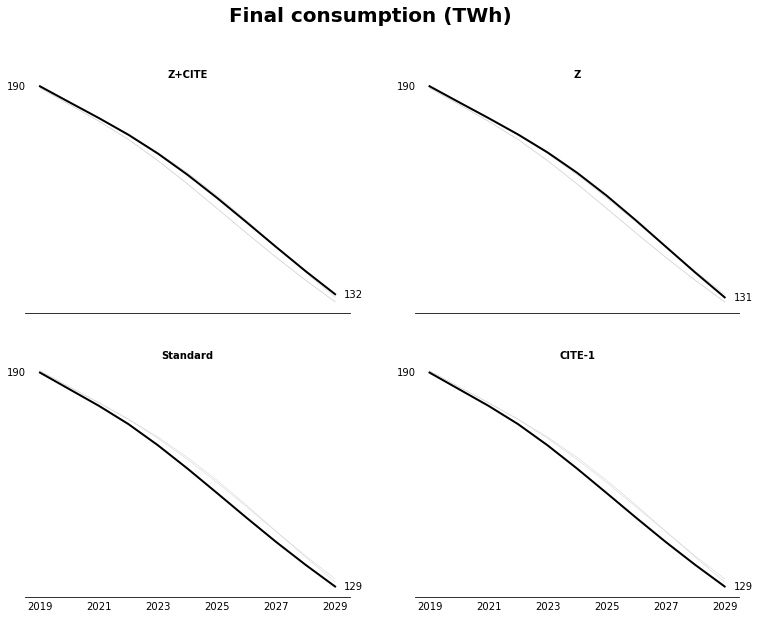

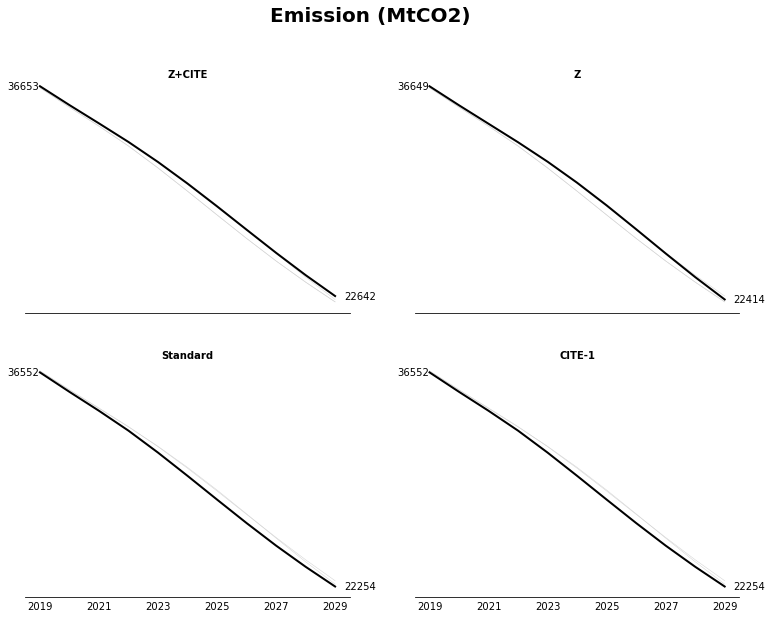

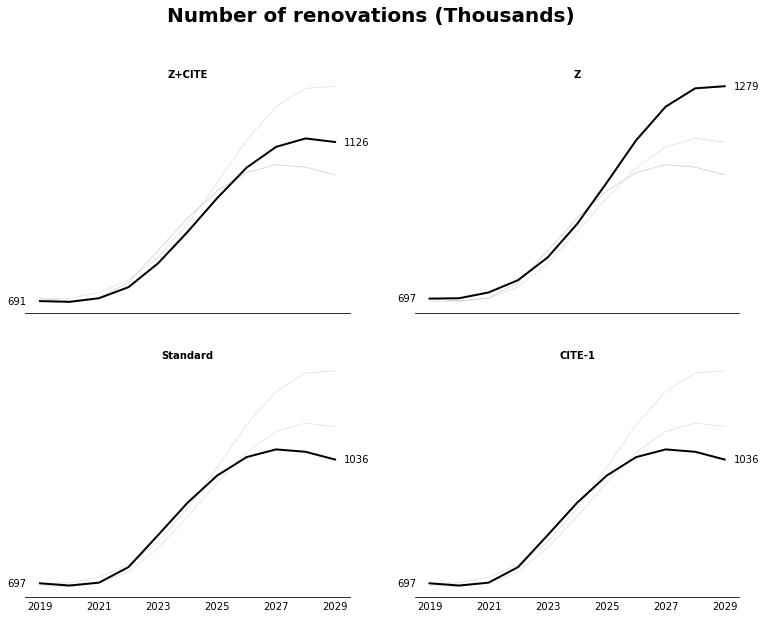

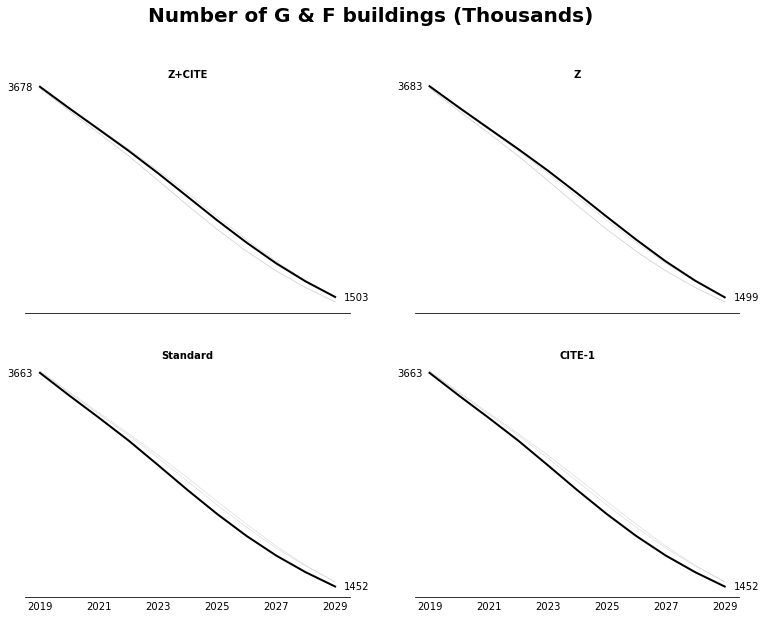

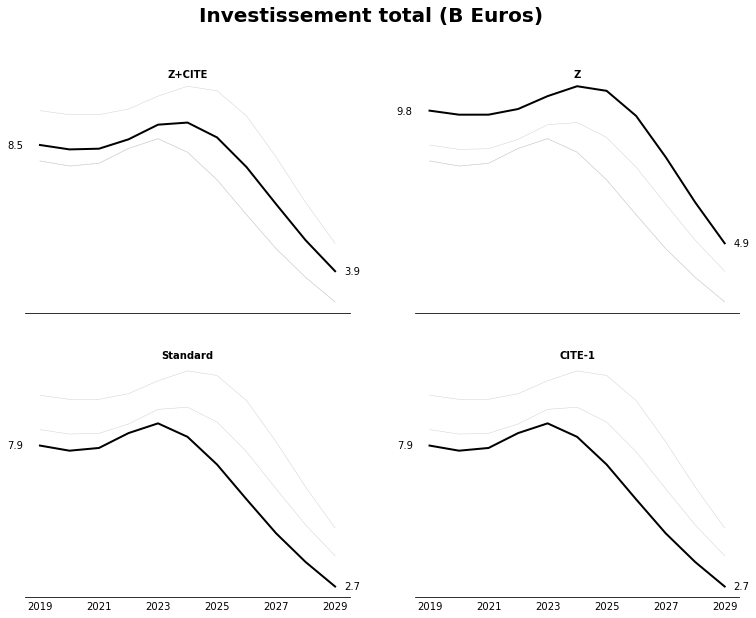

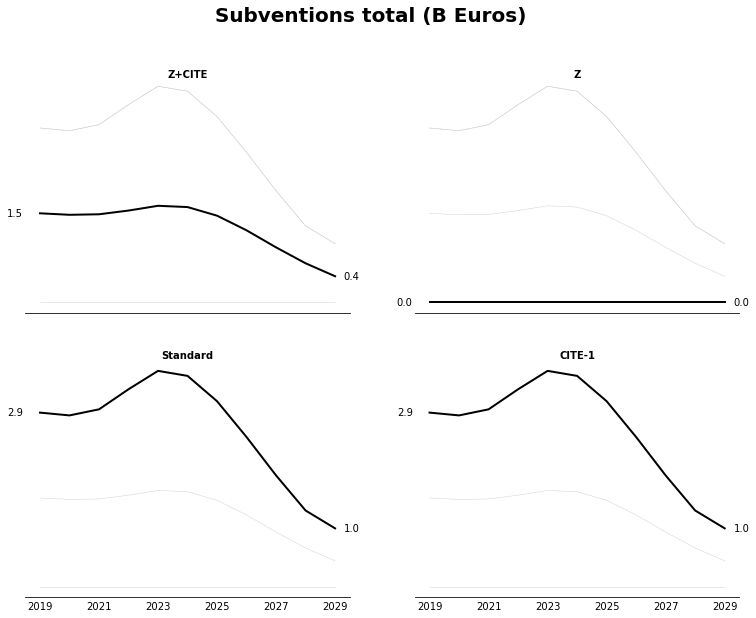

In [39]:
name = ['Consumption', 'Emission', 'Total number of renovations', 'Number of G & F buildings', 'Investment macro', 'Subsidies macro']
title = ['Final consumption (TWh)', 'Emission (MtCO2)', 'Number of renovations (Thousands)', 'Number of G & F buildings (Thousands)', 'Investissement total (B Euros)', 'Subventions total (B Euros)']
fmt_val = [lambda x: '{:.0f}'.format(x / 10**9), lambda x: '{:.0f}'.format(x / 10**9), lambda x: '{:.0f}'.format(x / 10**3), lambda x: '{:,.0f}'.format(x / 10**3), lambda x: '{:,.1f}'.format(x / 10**9), lambda x: '{:,.1f}'.format(x / 10**9)]
full_input = list(zip(name, title, fmt_val))

for i in full_input:
    df = scenario2df(scenarios_dict, i[0])
    economic_subplots(df.T, i[1], n_columns=2, format_val=i[2])

# TODO 
- energy saving / energy
- energy saving conventional
- heating intensity
- renovation by decision-maker
- housing by dpe 
- table_plot transition


In [31]:
full_input = list(zip(name, title, fmt_val))

In [32]:
full_input

[('Consumption', 'Final consumption (TWh)', <function __main__.<lambda>(x)>),
 ('Emission', 'Emission (MtCO2)', <function __main__.<lambda>(x)>),
 ('Total number of renovations',
  'Number of renovations (Thousands)',
  <function __main__.<lambda>(x)>),
 ('Number of G & F buildings',
  'Number of G & F buildings (Billions)',
  <function __main__.<lambda>(x)>)]

In [40]:
main_result['Z'] - main_result['Standard']

,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
Consumption,4.822533e+08,6.636266e+08,8.796534e+08,1.415818e+09,2.327134e+09,3.155492e+09,3.605041e+09,3.546206e+09,3.024812e+09,2.182081e+09,1.273936e+09
Consumption construction,1.692099e+03,1.502567e+05,1.459574e+06,7.947819e+06,2.982944e+07,7.501369e+07,1.332192e+08,1.983999e+08,2.730408e+08,3.621608e+08,4.700330e+08
Consumption total,4.822549e+08,6.637769e+08,8.811130e+08,1.423766e+09,2.356963e+09,3.230506e+09,3.738260e+09,3.744606e+09,3.297852e+09,2.544241e+09,1.743969e+09
Emission,9.686149e+10,1.271034e+11,1.585957e+11,2.516730e+11,4.186929e+11,5.662493e+11,6.382125e+11,6.126802e+11,5.018080e+11,3.348321e+11,1.608008e+11
Emission construction,4.241007e+05,2.512920e+07,2.385809e+08,1.300982e+09,4.917421e+09,1.244680e+10,2.219751e+10,3.321447e+10,4.602412e+10,6.157932e+10,8.058923e+10
Emission total,9.686191e+10,1.271285e+11,1.588342e+11,2.529740e+11,4.236103e+11,5.786961e+11,6.604100e+11,6.458946e+11,5.478321e+11,3.964115e+11,2.413900e+11
Total number of renovations,1.459323e+02,7.178590e+03,1.516472e+04,6.378902e+03,-1.890023e+04,-1.609062e+04,2.240008e+04,8.820066e+04,1.590482e+05,2.157641e+05,2.427036e+05
Number of G & F buildings,2.063916e+04,3.613003e+04,4.964346e+04,7.108110e+04,1.035114e+05,1.264443e+05,1.310470e+05,1.211905e+05,9.840173e+04,7.079449e+04,4.716686e+04
Investment macro,1.857875e+09,1.897328e+09,1.797387e+09,1.457198e+09,1.573057e+09,2.437375e+09,3.289841e+09,3.649431e+09,3.384252e+09,2.771660e+09,2.163554e+09
Private investment macro,4.727241e+09,4.720717e+09,4.720855e+09,4.711709e+09,5.131144e+09,5.913009e+09,6.347234e+09,6.115643e+09,5.217162e+09,4.025831e+09,3.123210e+09


main_result is a summary of important macro results from Res-IRF scenario:
- Consumption  
- Consumption construction   
- Consumption total   
- Emission   
- Emission construction   
- Emission total  
- Total number of renovations 
- Number of G & F buildings   
- Investment macro  
- Private investment macro   
- Subsidies macro   
- Energy taxes   
- Energy taxes construction   
- Energy taxes total   
- Emission saving  
- Energy saving  

Need to rename.
Need to define fuel poverty.
Emission saving and Energy saving is just before and after renovation?

By substracting the reference scenario values to the contrefactual scenario values, we can access:
- **Objective 1**: Reduction of final energy_consumption: Consumption total[ref] - Consumption total[contrefactual] < 0
- **Objective 2**: Total renovations created: Total number of renovations[ref] - Total number of renovations[contrefactual] > 0
- **Objective 3**: Reduction of G & F buildings: Number of G & F buildingss[ref] - Number of G & F buildings[contrefactual] < 0
- **Objective 4**: Numer of B buildings: Numer of B building[ref] - Numer of B building[contrefactual]
- **Objective 5**: Total renovations created: Total number of renovations[ref] - Total number of renovations[contrefactual]

Total cost of the policy is 

- Total cost of the policy: 
    - Subsidies macro[ref] - Subsidies macro[contrefactual]
    -  - (Energy taxes[ref] - Energy taxes[contrefactual])




In [12]:
main_result['Standard'].index

Index(['Consumption', 'Consumption construction', 'Consumption total',
       'Emission', 'Emission construction', 'Emission total',
       'Total number of renovations', 'Number of G & F buildings',
       'Investment macro', 'Private investment macro', 'Subsidies macro',
       'Energy taxes', 'Energy taxes construction', 'Energy taxes total',
       'Emission saving', 'Energy saving'],
      dtype='object')

# Overview

In [ ]:
Impact of h

# Costs

In [21]:
subsidies_macro = {scenario: main_result[scenario].loc['Subsidies macro', :] for scenario in scenarios}
subsidies_macro = pd.DataFrame(subsidies_macro).T / 10**9
cost_subsidies = abs(subsidies_macro.iloc[0, :] - subsidies_macro.iloc[1, :])

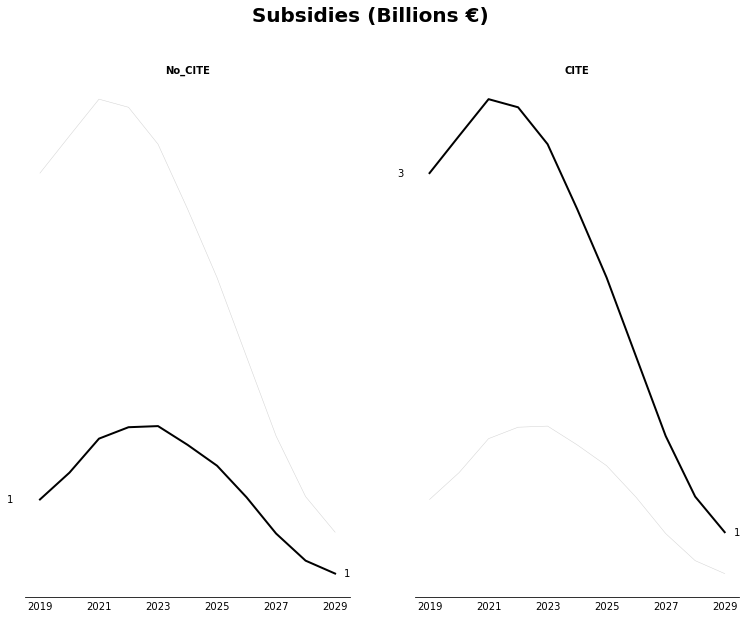

In [26]:
economic_subplots(subsidies_macro, 'Subsidies (Billions €)', n_columns=2)

## Objective 1 - Reduction consumption

Objective is to reduce of 20% in 2030, and 50% in 2050.  
Consumption total is measured in kWh --> / 10**9 --> TWh

In [17]:
consumption_total = {scenario: main_result[scenario].loc['Consumption total', :] for scenario in scenarios}
consumption_total = pd.DataFrame(consumption_total).T / 10**9
consumption_subsidies = consumption_total.iloc[0, :] - consumption_total.iloc[1, :]
consumption_total

,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
No_CITE,222.093616,218.637174,215.116079,211.55562,208.042203,204.661095,201.532041,198.881269,196.965443,195.990243,196.107666
CITE,221.358276,217.177794,212.936675,208.70590,204.641966,200.869035,197.521559,194.825828,193.004517,192.234195,192.617515


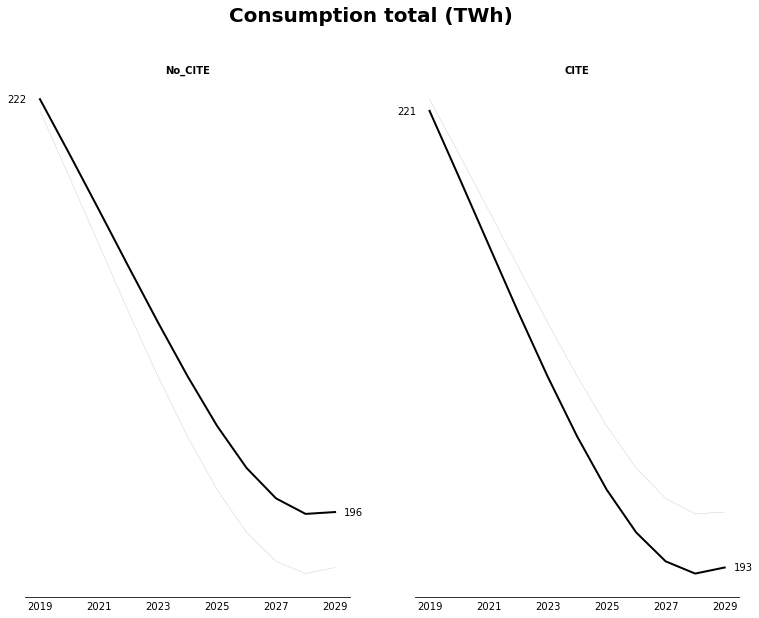

In [10]:
economic_subplots(consumption_total, 'Consumption total (TWh)', n_columns=2)

### Efficacity

Billion € / TWh cumac --> 10^9€ / 10^9 kWh --> €/kWh

In [28]:
df = pd.concat((cost_subsidies, consumption_subsidies, cost_subsidies / consumption_subsidies), axis=1)
df.columns = ['Billions €', 'TWh cumac', '€/kWh']
df

,Billions €,TWh cumac,€/kWh
2019,2.008820,0.735340,2.731823
2020,2.072434,1.459380,1.420078
2021,2.089377,2.179404,0.958692
2022,1.969135,2.849721,0.690992
2023,1.735115,3.400237,0.510292
2024,1.451922,3.792059,0.382885
2025,1.157663,4.010482,0.288659
2026,0.864834,4.055442,0.213253
2027,0.600633,3.960927,0.151639
2028,0.394245,3.756048,0.104963


### Efficiency

#### a

## Objective 2 - Total number of renovations

Renovation of 500,000 housings/yr with 120,000/yr for social-housing.

In [34]:
renovations_total = {scenario: main_result[scenario].loc['Total number of renovations', :] for scenario in scenarios}
renovations_total = pd.DataFrame(renovations_total).T / 1000
renovations_subsidies = abs(renovations_total.iloc[0, :] - renovations_total.iloc[1, :])
renovations_total

,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
No_CITE,495.346489,568.290421,695.092775,805.247815,896.304993,962.14095,1011.042460,1033.281996,1030.604747,1010.045018,976.657644
CITE,600.658441,672.693731,795.537978,894.665502,967.892098,1012.35333,1039.387253,1041.139917,1021.056760,987.626607,945.763287


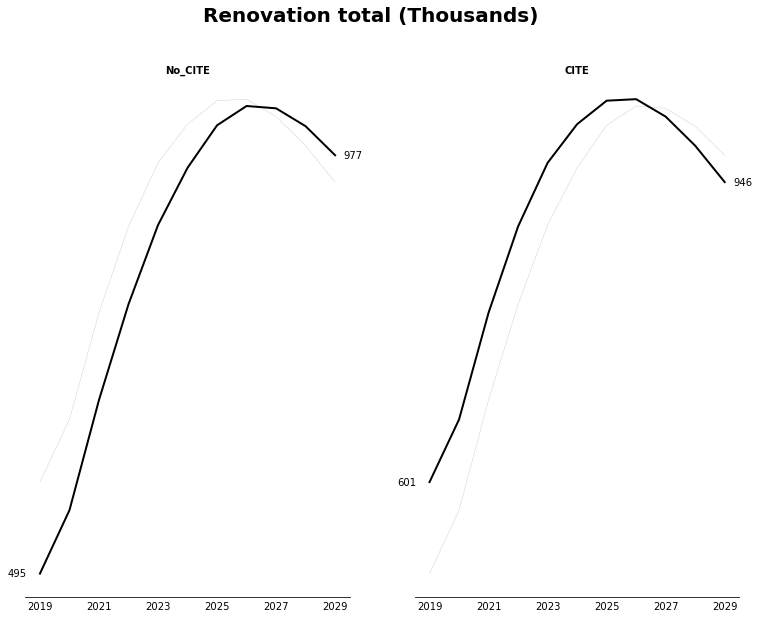

In [35]:
economic_subplots(renovations_total, 'Renovation total (Thousands)', n_columns=2)

### Efficacity

Billion € / TWh cumac --> 10^9€ / 10^9 kWh --> €/kWh

In [41]:
df = pd.concat((cost_subsidies, renovations_subsidies, cost_subsidies * 10**9 / (renovations_subsidies * 10**3)), axis=1)
df.columns = ['Billions €', 'Thousands renovation', '€/renovation']
df

,Billions €,Thousands renovation,€/renovation
2019,2.008820,105.311952,19074.945833
2020,2.072434,104.403310,19850.266622
2021,2.089377,100.445202,20801.166649
2022,1.969135,89.417687,22021.761089
2023,1.735115,71.587106,24237.808379
2024,1.451922,50.212380,28915.625206
2025,1.157663,28.344793,40842.187962
2026,0.864834,7.857921,110058.888095
2027,0.600633,9.547987,62906.765426
2028,0.394245,22.418411,17585.756377


## Objective 3 - Number of G & F buildings

No more F and G buildings in 2025.

In [42]:
gf_buildings = {scenario: main_result[scenario].loc['Number of G & F buildings', :] for scenario in scenarios}
gf_buildings = pd.DataFrame(gf_buildings).T / 10**6
gf_buildings_subsidies = abs(gf_buildings.iloc[0, :] - gf_buildings.iloc[1, :])
gf_buildings

,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
No_CITE,4.287247,4.042440,3.765302,3.468432,3.162539,2.856809,2.560277,2.284456,2.032637,1.808668,1.614379
CITE,4.247479,3.967915,3.663677,3.347361,3.030066,2.721404,2.428681,2.162148,1.922225,1.712576,1.531766


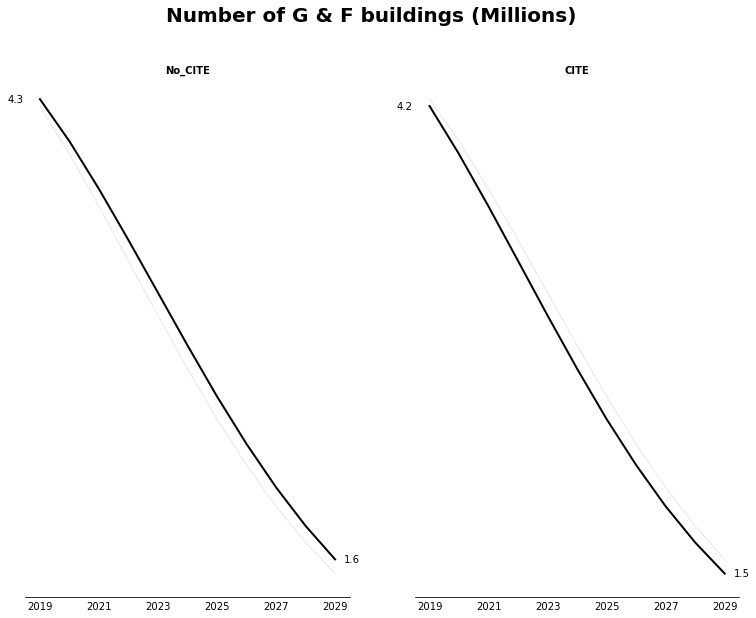

In [14]:
economic_subplots(gf_buildings, 'Number of G & F buildings (Millions)', n_columns=2, format_val=lambda x: '{:.1f}'.format(x))

### Efficacity

In [43]:
df = pd.concat((cost_subsidies, gf_buildings_subsidies, cost_subsidies * 10**9 / (gf_buildings_subsidies * 10**3)), axis=1)
df.columns = ['Billions €', 'Thousands renovation', '€/renovation']
df

,Billions €,Thousands renovation,€/renovation
2019,2.008820,0.039769,5.051260e+07
2020,2.072434,0.074525,2.780862e+07
2021,2.089377,0.101624,2.055979e+07
2022,1.969135,0.121072,1.626423e+07
2023,1.735115,0.132473,1.309786e+07
2024,1.451922,0.135405,1.072281e+07
2025,1.157663,0.131596,8.797117e+06
2026,0.864834,0.122308,7.070937e+06
2027,0.600633,0.110411,5.439967e+06
2028,0.394245,0.096092,4.102790e+06


## Objective 5

## Objective 4 - Emission total

gCO2 --> MTCO2 / 10**12

In [45]:
emission_total = {scenario: main_result[scenario].loc['Emission total', :] for scenario in scenarios}
emission_total = pd.DataFrame(emission_total).T / 10**12
emission_subsidies = abs(emission_total.iloc[0, :] - emission_total.iloc[1, :])

emission_total

,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
No_CITE,41.894457,40.836763,39.724279,38.584851,37.449267,36.343636,35.297246,34.355210,33.565049,32.962956,32.574572
CITE,41.729677,40.515671,39.257877,37.992288,36.760919,35.594447,34.522218,33.587077,32.828787,32.277104,31.948096


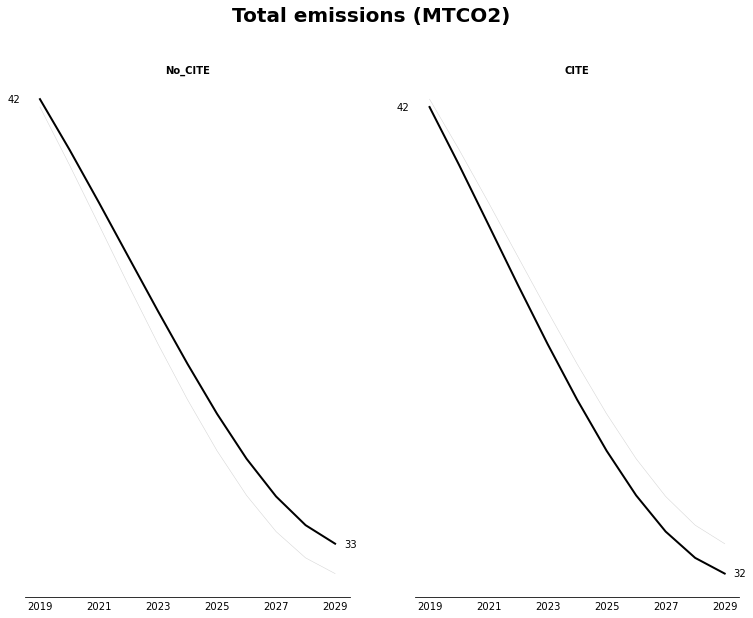

In [16]:
economic_subplots(emission_total, 'Total emissions (MTCO2)', n_columns=2, format_val=lambda x: '{:.0f}'.format(x))

### Efficacity

Billion € / Millions TCO2 cumac --> 10^9€ / 10^6 TCO2 --> €/kWh

In [48]:
df = pd.concat((cost_subsidies, emission_subsidies, cost_subsidies * 10**9 / (emission_subsidies * 10**6)), axis=1)
df.columns = ['Billions €', 'M TCO2', '€/kWh']
df

,Billions €,M TCO2,€/kWh
2019,2.008820,0.164780,12190.906536
2020,2.072434,0.321092,6454.322418
2021,2.089377,0.466402,4479.776556
2022,1.969135,0.592563,3323.081829
2023,1.735115,0.688348,2520.693118
2024,1.451922,0.749190,1937.990152
2025,1.157663,0.775027,1493.706529
2026,0.864834,0.768133,1125.890247
2027,0.600633,0.736263,815.786178
2028,0.394245,0.685853,574.824187
